In [1]:
## Initial imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime


In [2]:
url = 'https://raw.githubusercontent.com/umarovj/Fantastic_4/main/kc_house_data.csv'
house_df = pd.read_csv(url)
house_df.head(5)
# Dataset is now stored in a Pandas Dataframe

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# house_df = pd.read_csv('/kc_house_data.csv')
# house_df.head(5)

In [4]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
house_df.shape

(21613, 21)

In [6]:
house_df.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21611
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [7]:
house_df = house_df.dropna()

In [8]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,3.409421,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
std,2.876592e+09,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,0.650755,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long  

In [10]:
# Load the .csv dataset

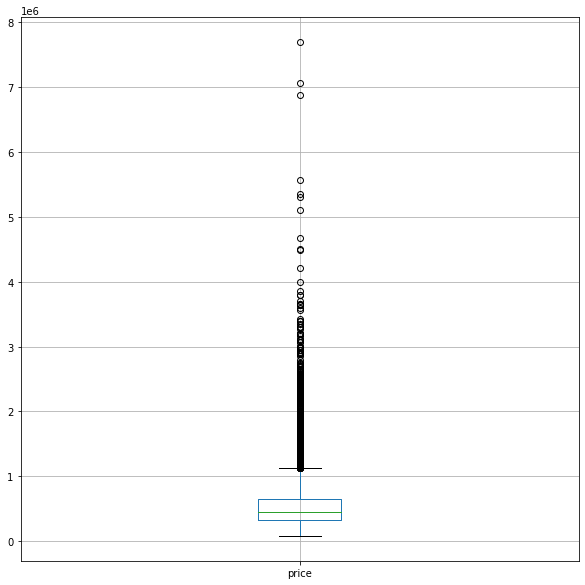

In [11]:
#boxplot of price (central dataset)
house_df.boxplot(['price'], figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ecc723a90>,
      dtype=object)

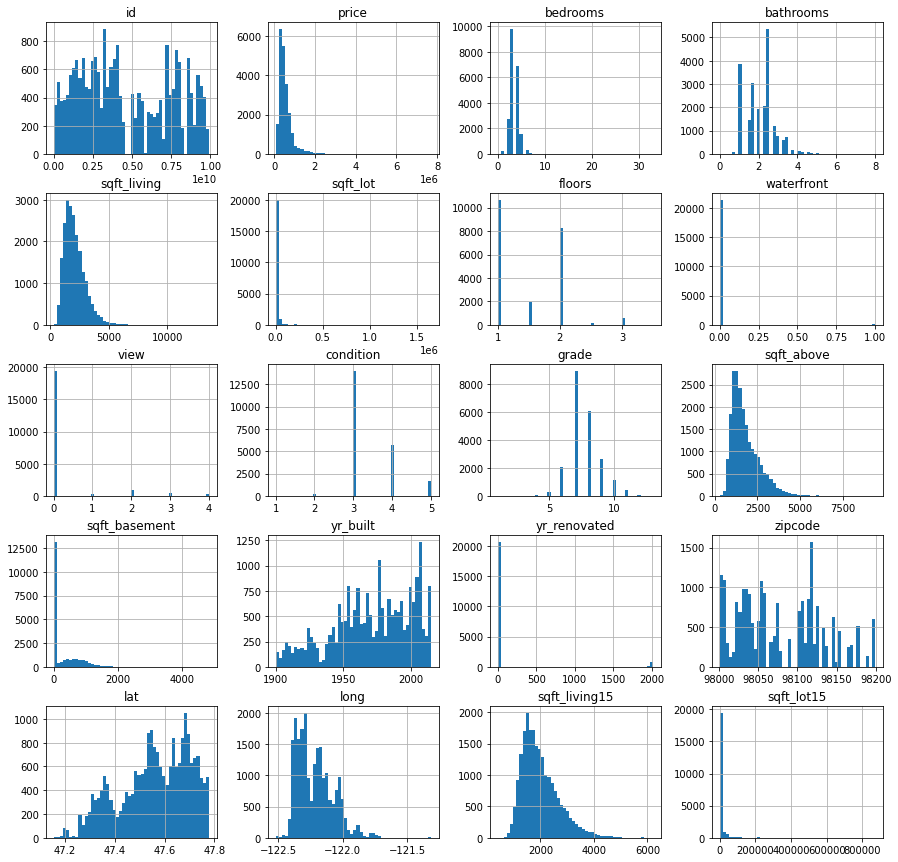

In [12]:
#histograms of our data
house_df.hist(bins=50, figsize=(15, 15))

In [13]:
# Remove six columns name is 'waterfront', 'view', 'lat', 'long', 'sqft_living15' and 'sqft_lot15'

house_df = house_df.drop(labels=['id', 'view', 'lat', 'long', 'sqft_living15', 'sqft_lot15' , 'yr_renovated'], axis = 1)
house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,98178
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,98125
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,98028
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,98136
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,98103
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,98146
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,98144
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,98027


In [14]:
#date time conversion
house_df['date'] = pd.to_datetime(house_df['date'])

house_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180.0,0,1955,98178
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170.0,400,1951,98125
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,3,6,770.0,0,1933,98028
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050.0,910,1965,98136
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680.0,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530.0,0,2009,98103
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310.0,0,2014,98146
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020.0,0,2009,98144
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600.0,0,2004,98027


In [15]:
#Replace all 0 in "yr_renovated" with NaN
#house_df["yr_renovated"] = house_df["yr_renovated"].astype(int).replace(0, np.nan)
#house_df

In [16]:
# Import additional dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [17]:
# Set X and Y variables
X= house_df.drop(['price', 'date'], axis=1).values
y = house_df['price'].values

In [18]:
# Set train, test, split parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
# Set variable for MinMaxScaler
scaler= MinMaxScaler()

In [20]:
X_train= scaler.fit_transform(X_train)

In [21]:
X_test= scaler.transform(X_test)

In [22]:
X_train.shape

(15127, 12)

In [23]:
# Setup Keras model
model = Sequential()

model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))
model.add(Dense(19, activation= 'relu'))

model.add(Dense(1))

model.compile(optimizer= 'adam',loss= 'mse')

In [25]:
# Fit model
model.fit(x= X_train, y= y_train, validation_data= (X_test, y_test), batch_size= 128,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 8ms/step - loss: 89089974272.0000 - val_loss: 85353463808.0000
Epoch 2/100
119/119 [==============================] - 1s 8ms/step - loss: 86945177600.0000 - val_loss: 83268567040.0000
Epoch 3/100
119/119 [==============================] - 1s 8ms/step - loss: 84662214656.0000 - val_loss: 81029488640.0000
Epoch 4/100
119/119 [==============================] - 1s 5ms/step - loss: 82191400960.0000 - val_loss: 78695366656.0000
Epoch 5/100
119/119 [==============================] - 1s 8ms/step - loss: 79622356992.0000 - val_loss: 76188975104.0000
Epoch 6/100
119/119 [==============================] - 1s 6ms/step - loss: 76908183552.0000 - val_loss: 73652002816.0000
Epoch 7/100
119/119 [==============================] - 1s 6ms/step - loss: 74101456896.0000 - val_loss: 70988890112.0000
Epoch 8/100
119/119 [==============================] - 1s 5ms/step - loss: 71247495168.0000 - val_loss: 68419182592.0000
Epoch 9/100
119/119 [===========

In [26]:
# Check losses in model
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,8.908997e+10,8.535346e+10
1,8.694518e+10,8.326857e+10
2,8.466221e+10,8.102949e+10
3,8.219140e+10,7.869537e+10
4,7.962236e+10,7.618898e+10
...,...,...
95,4.137203e+10,4.222937e+10
96,4.132961e+10,4.223561e+10
97,4.133058e+10,4.215926e+10
98,4.124685e+10,4.211291e+10


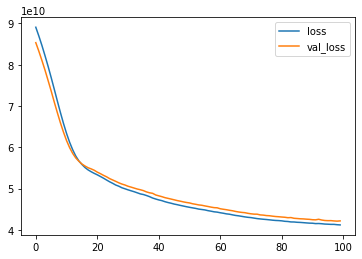

In [27]:
# Plot losses
losses.plot()

In [28]:
# Set Prediction variable
prediction = model.predict(X_test)

In [29]:
# Mean absolute error testing
mean_absolute_error(y_test, prediction)

134294.22291469868

In [30]:
# Mean square testing
mean_squared_error(y_test, prediction)

42171161310.51395

In [31]:
# Explained variance score
explained_variance_score(y_test, prediction)

0.6832630416599148

In [33]:
# Summary statistics
house_price['price'].describe()

NameError: ignored

In [ ]:
# Plot test data
plt.figure(figsize=(15,8))
plt.scatter(y_test, prediction)
plt.plot(y_test,y_test,'r')

In [ ]:
# Predict the price of a certain house in our data
predict_price= hsp.drop(['price', 'date'], axis=1).iloc[0]
predict_price

In [ ]:
predict_price = scaler.transform(predict_price.values.reshape(-1,20))

In [ ]:
model.predict(predict_price)

In [ ]:
# Compare predicted price against actual price
hsp.head(1)